In [10]:
import os, sys
# sys.path.append('home/cchampion/programs/Ensembler/ensembler')

os.chdir('/home/cchampion/programs/Ensembler')

import ensembler

#Imports:
import numpy as np
from matplotlib import pylab as plt
from matplotlib.pyplot import cm


#import Ensembler
from ensembler.potentials import OneD as pot


##Imports:
import ensembler.visualisation.plotPotentials as exPlot

In [11]:
def fill_curve(ax, x, f_x, upper = 0.5):
    """
    Fills between curves
    """
    y = np.ones(len(f_x)) * min(f_x) + upper
    ax.fill_between(x, f_x, y, where=y > f_x, color = 'lightgrey', alpha = 0.5, interpolate = True)
    return None

In [12]:
test_timing_with_points=1000
positions = np.linspace(-10, 10, test_timing_with_points)


V_offset_A = 0
V_offset_B = 0.5
V_offset_C = -0.5


r_0_A = 2
r_0_B = 4
r_0_C = 6.5


k_A = 2
k_B = 2
k_C = 2


V_A = pot.harmonicOscillatorPotential(x_shift=r_0_A, y_shift=V_offset_A, k=k_A)
V_B = pot.harmonicOscillatorPotential(x_shift=r_0_B, y_shift=V_offset_B, k=k_B)
V_C = pot.harmonicOscillatorPotential(x_shift=r_0_C, y_shift=V_offset_C, k=k_C)

eoffs = np.array([V_offset_A, V_offset_B, V_offset_C]) - min([V_offset_A, V_offset_B, V_offset_C])

V_R = pot.envelopedPotential(V_is=[V_A,V_B, V_C], s=1, eoff=[0, 0, 0])
V_R2 = pot.envelopedPotential(V_is=[V_A,V_B, V_C], s=1, eoff=eoffs)
V_R3 = pot.envelopedPotential(V_is=[V_A,V_B, V_C], s=0.5, eoff=eoffs)

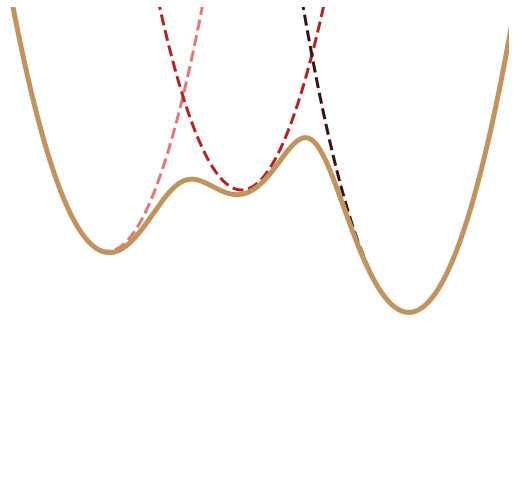

In [13]:
fig,ax = plt.subplots(ncols=1, figsize = [9, 9])

# Backup colors: "#c596c5", "#96c596", "#96aec5"

lw = 3

#ax.plot(positions, V_A.ene(positions), c="#c596c5", lw=lw, zorder=3, label="$V_A$")
#ax.plot(positions, V_B.ene(positions), c="#96c596", lw=lw, zorder=3, label="$V_B$")
#ax.plot(positions, V_C.ene(positions), c="#96aec5", lw=lw, zorder=3, label="$V_C$")

# new reds 

ax.plot(positions, V_A.ene(positions), c="#e57676", lw=lw, zorder=3, label="$V_A$", ls = '--')
ax.plot(positions, V_B.ene(positions), c="firebrick", lw=lw, zorder=3, label="$V_B$", ls ='--')
ax.plot(positions, V_C.ene(positions), c="#371313", lw=lw, zorder=3, label="$V_C$", ls ='--')

padding = 1.5
ax.set_xlim([min([r_0_A, r_0_B, r_0_C]) - padding, max([r_0_A, r_0_B, r_0_C]) + padding ])
ax.set_ylim([-2, 2])  # c596c5

for side in ['top', 'bottom', 'right', 'left']:
    ax.spines[side].set_visible(False)
ax.tick_params(left=False, labelleft=False, bottom =False, labelbottom =False)
    

ax.plot(positions, V_R.ene(positions), c='#BF945F', lw=5, ls = '-', zorder=4, label="$V_R$", alpha = 1)
#ax.plot(positions, V_R2.ene(positions), c=backup_colors[0], lw=4, ls = '-', zorder=4, label="$V_R$")
#ax.plot(positions, V_R3.ene(positions), c="red", lw=2, ls = '--', zorder=4, label="$V_R$")  

In [14]:
color = iter(cm.get_cmap('viridis')(np.linspace(0, 1, len(Vrs))))

NameError: name 'Vrs' is not defined

In [15]:
c = next(color)

NameError: name 'color' is not defined

In [16]:
c

NameError: name 'c' is not defined

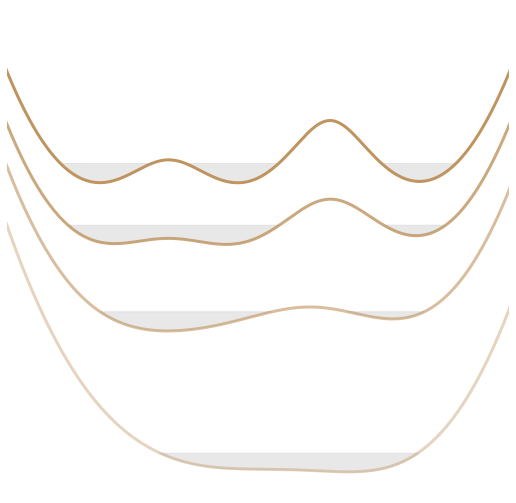

In [17]:

s_values = [1, 0.65, 0.35, 0.25]

all_eoffs = np.zeros((len(s_values),1),dtype=eoffs.dtype) + eoffs

all_eoffs[-2] = np.array([0.25, 0.5, 0.15])
all_eoffs[-1] = np.array([0, 1, 1])

Vrs = []                 
for s, eoff in zip(s_values, all_eoffs):
    Vrs.append(pot.envelopedPotential(V_is=[V_A, V_B, V_C], s=s, eoff=eoff))
                         
fig,ax = plt.subplots(ncols=1, figsize = [9, 9])

padding = 1.25
ax.set_xlim([min([r_0_A, r_0_B, r_0_C]) - padding, max([r_0_A, r_0_B, r_0_C]) + padding ])
ax.set_ylim([-5, 2])  # c596c5

for side in ['top', 'bottom', 'right', 'left']:
    ax.spines[side].set_visible(False)
ax.tick_params(left=False, labelleft=False, bottom =False, labelbottom =False)

color = iter(cm.get_cmap('Greys_r')(np.linspace(0, 1, len(Vrs)+3)))

# color = iter(cm.get_cmap('viridis')(np.linspace(0, 1, len(Vrs))))
c = next(color)
backup_colors = []

alphas = [1, 0.8, 0.6, 0.4]

for i, v in enumerate(Vrs):
    if i == 1:
        pass#break
    backup_colors.append(c)
    
    ax.plot(positions, v.ene(positions) - i*0.75, lw=3, ls = '-', zorder=4, label="$V_R$",c='#BF945F', alpha = alphas[i])
    
    fill_curve(ax, positions, v.ene(positions) - i*0.75, upper = 0.275)
    
    if i != 3:
        c = next(color)
    

pass

In [18]:
def arrowed_spines(fig, ax):
    
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()
    
    xmin += 0.75
    ymin += 0.75
    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./30.*(ymax-ymin) 
    hl = 1./30.*(xmax-xmin)
    lw = 1.5 # axis line width
    ohg = 0.2 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


0
1
2
3
4


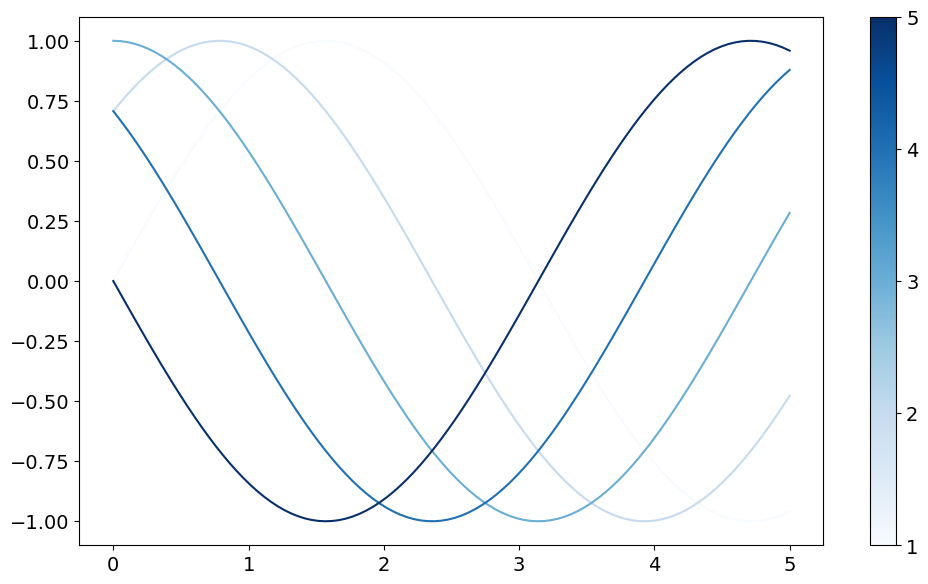

In [19]:
import matplotlib as mpl
n_lines = 5
x = np.linspace(0, 5, 100)
y = np.sin(x[:, None] + np.pi * np.linspace(0, 1, n_lines))
c = np.arange(1, n_lines + 1)

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])

fig, ax = plt.subplots(dpi=100)
for i, yi in enumerate(y.T):
    print (i)
    ax.plot(x, yi, c=cmap.to_rgba(i + 1))
fig.colorbar(cmap, ticks=c)
plt.show()


In [20]:
print (mpl.colors.to_hex(cmap.to_rgba(2)))

#c6dbef


In [21]:
print (mpl.colors.to_hex(cmap.to_rgba(5)))

#08306b


# Making a five welled potential

In [22]:
test_timing_with_points=1000
positions = np.linspace(-10, 10, test_timing_with_points)


V_offset_A = 0
V_offset_B = 0.5
V_offset_C = -0.5
V_offset_D = 0.75
V_offset_E = 0.75



r_0_A = 2
r_0_B = 4
r_0_C = 6.5

r_0_D = 0
r_0_E = 9


k_A = 2
k_B = 2
k_C = 2


V_A = pot.harmonicOscillatorPotential(x_shift=r_0_A, y_shift=V_offset_A, k=k_A)
V_B = pot.harmonicOscillatorPotential(x_shift=r_0_B, y_shift=V_offset_B, k=k_B)
V_C = pot.harmonicOscillatorPotential(x_shift=r_0_C, y_shift=V_offset_C, k=k_C)

V_D = pot.harmonicOscillatorPotential(x_shift=r_0_D, y_shift=V_offset_D, k=k_C)
V_E = pot.harmonicOscillatorPotential(x_shift=r_0_E, y_shift=V_offset_E, k=k_C)


eoffs = np.array([V_offset_A, V_offset_B, V_offset_C]) - min([V_offset_A, V_offset_B, V_offset_C])

V_R = pot.envelopedPotential(V_is=[V_A,V_B, V_C, V_D, V_E], s=1, eoff=[0, 0, 0, 0, 0])



#V_R2 = pot.envelopedPotential(V_is=[V_A,V_B, V_C], s=1, eoff=eoffs)
#V_R3 = pot.envelopedPotential(V_is=[V_A,V_B, V_C], s=0.5, eoff=eoffs)

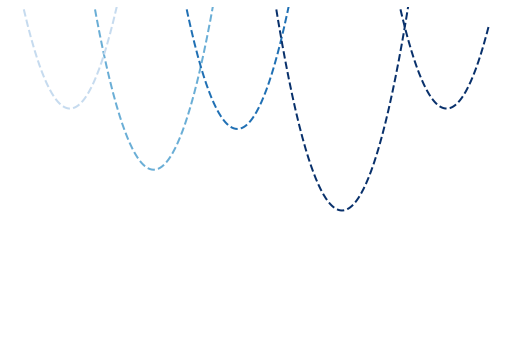

In [23]:
fig,ax = plt.subplots(ncols=1, figsize = [9, 6])

# Backup colors: "#c596c5", "#96c596", "#96aec5"

lw = 2

# new reds 

ax.plot(positions, V_A.ene(positions), c=cmap.to_rgba(3), lw=lw, zorder=3, label="$V_A$", ls = '--')
ax.plot(positions, V_B.ene(positions), c=cmap.to_rgba(4), lw=lw, zorder=3, label="$V_B$", ls ='--')
ax.plot(positions, V_C.ene(positions), c=cmap.to_rgba(5), lw=lw, zorder=3, label="$V_C$", ls ='--')

ax.plot(positions, V_D.ene(positions), c=cmap.to_rgba(2), lw=lw, zorder=3, label="$V_B$", ls ='--')
ax.plot(positions, V_E.ene(positions), c=cmap.to_rgba(6), lw=lw, zorder=3, label="$V_C$", ls ='--')


padding = 1.5
ax.set_xlim([min([r_0_A, r_0_B, r_0_C, r_0_D, r_0_E]) - padding, max([r_0_A, r_0_B, r_0_C, r_0_D, r_0_E]) + padding ])
ax.set_ylim([-2, 2])  # c596c5

for side in ['top', 'bottom', 'right', 'left']:
    ax.spines[side].set_visible(False)
ax.tick_params(left=False, labelleft=False, bottom =False, labelbottom =False)
    

# ax.plot(positions, V_R.ene(positions), c='#BF945F', lw=6, ls = '-', zorder=4, label="$V_R$", alpha = 0.75)

In [24]:
fig.savefig('/home/cchampion/Desktop/test_reeds222.png', facecolor= None)

# 5-well RE-EDS

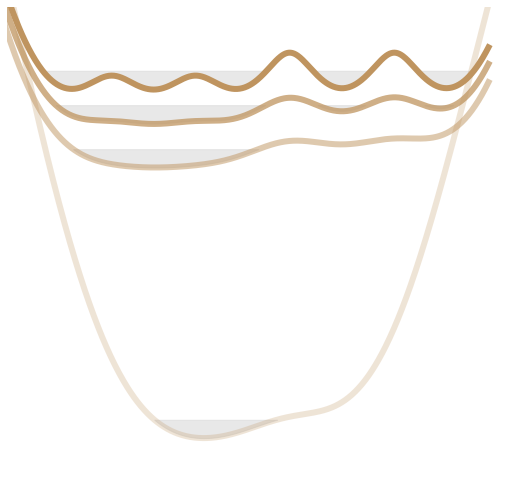

In [25]:
fig,ax = plt.subplots(ncols=1, figsize = [9, 9])

# Backup colors: "#c596c5", "#96c596", "#96aec5"

lw = 2

# new reds 


padding = 1.5
ax.set_xlim([min([r_0_A, r_0_B, r_0_C, r_0_D, r_0_E]) - padding, max([r_0_A, r_0_B, r_0_C, r_0_D, r_0_E]) + padding ])
ax.set_ylim([-10, 2])  # c596c5

for side in ['top', 'bottom', 'right', 'left']:
    ax.spines[side].set_visible(False)
ax.tick_params(left=False, labelleft=False, bottom =False, labelbottom =False)
    

V_R = pot.envelopedPotential(V_is=[V_A,V_B, V_C, V_D, V_E], s=1, 
                             eoff=[V_offset_A, V_offset_B, V_offset_C, V_offset_D, V_offset_E])


fill_curve(ax, positions, V_R.ene(positions), upper = 0.45)


ax.plot(positions, V_R.ene(positions), c='#BF945F', lw=6, ls = '-', zorder=4, label="$V_R$", alpha = 1)

V_R2 = pot.envelopedPotential(V_is=[V_A,V_B, V_C, V_D, V_E], s=0.5, eoff=[V_offset_A, V_offset_B, V_offset_C, V_offset_D, V_offset_E])
ax.plot(positions, V_R2.ene(positions)-0.4, c='#BF945F', lw=6, ls = '-', zorder=4, label="$V_R$", alpha = 0.75)

fill_curve(ax, positions, V_R2.ene(positions)-0.4, upper = 0.45)




V_R3 = pot.envelopedPotential(V_is=[V_A,V_B, V_C, V_D, V_E], s=0.35, eoff=[V_offset_A, V_offset_B, V_offset_C, V_offset_D, V_offset_E])

ax.plot(positions, V_R3.ene(positions)-0.8, c='#BF945F', lw=6, ls = '-', zorder=4, label="$V_R$", alpha = 0.5)
fill_curve(ax, positions, V_R3.ene(positions)-0.8, upper = 0.45)


V_R4 = pot.envelopedPotential(V_is=[V_A,V_B, V_C, V_D, V_E], s=0.3, eoff=[V_offset_A+4, V_offset_B+4, V_offset_C+4, V_offset_D-6, V_offset_E-6])

ax.plot(positions, V_R4.ene(positions)-3.2, c='#BF945F', lw=6, ls = '-', zorder=4, label="$V_R$", alpha = 0.25)
fill_curve(ax, positions, V_R4.ene(positions)-3.2, upper = 0.45)
# fig

# Make a plot with 4 states

In [26]:
test_timing_with_points=1000
positions = np.linspace(-10, 12, test_timing_with_points)


V_offset_A = 0.75
V_offset_B = 0
V_offset_C = 4
V_offset_D = 4.75


r_0_A = 1
r_0_B = 2

r_0_C = 7
r_0_D = 8


k_A = 1.5
k_B = 2
k_C = 2
k_D = 1.5

V_A = pot.harmonicOscillatorPotential(x_shift=r_0_A, y_shift=V_offset_A, k=k_A)
V_B = pot.harmonicOscillatorPotential(x_shift=r_0_B, y_shift=V_offset_B, k=k_B)
V_C = pot.harmonicOscillatorPotential(x_shift=r_0_C, y_shift=V_offset_C, k=k_C)

V_D = pot.harmonicOscillatorPotential(x_shift=r_0_D, y_shift=V_offset_D, k=k_D)

eoffs = np.array([V_offset_A, V_offset_B, V_offset_C]) - min([V_offset_A, V_offset_B, V_offset_C])

V_R = pot.envelopedPotential(V_is=[V_A,V_B, V_C, V_D], s=1, eoff=[0, 0, 0, 0,])

V_R_twostate = pot.envelopedPotential(V_is=[V_B, V_C], s=1, eoff=[0, 0,])

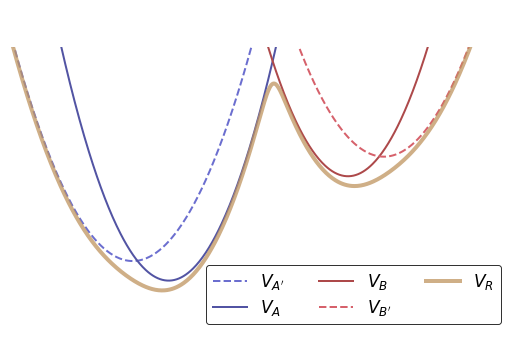

In [27]:
fig,ax = plt.subplots(ncols=1, figsize = [9, 6])

x = 9

ax.plot(positions, V_A.ene(positions), c=colors_tab20b[2], lw=lw, zorder=3, label="$V_{A^{\prime}}$", ls = '--')
ax.plot(positions, V_B.ene(positions), c=colors_tab20b[1], lw=lw, zorder=3, label="$V_{A}$", ls ='-')

ax.plot(positions, V_C.ene(positions), c=colors_tab20b[x+1], lw=lw, zorder=3, label="$V_{B}$", ls ='-')
ax.plot(positions, V_D.ene(positions), c=colors_tab20b[x+2], lw=lw, zorder=3, label="$V_{B^{\prime}}$", ls ='--')


for side in ['top', 'bottom', 'right', 'left']:
    ax.spines[side].set_visible(False)
ax.tick_params(left=False, labelleft=False, bottom =False, labelbottom =False)

padding = 3.5
ax.set_xlim([min([r_0_A, r_0_B, r_0_C, r_0_D]) - padding, max([r_0_A, r_0_B, r_0_C, r_0_D]) + 3.5 ])

ax.set_ylim([-2, 10.5])  # c596c5

ax.plot(positions, V_R.ene(positions)-0.15, c='#BF945F', lw=4, ls = '-', zorder=4, label="$V_R$", alpha = 0.75)
# ax.plot(positions, V_R_twostate.ene(positions)-0.15, c='#BF945F', lw=4, ls = '-', zorder=4, label="$V_R$", alpha = 0.75)

ax.legend(fancybox=True, edgecolor ='black', ncol =3, fontsize = 17, labelspacing = 0.35)

import matplotlib.patches as patches

rect = patches.Rectangle((-10, 9), 100, 100, linewidth=2, edgecolor='white', facecolor='white', zorder=10)
ax.add_patch(rect)


In [28]:
fig.savefig('/home/cchampion/Desktop/4_state_eds_potential_fig4.png', dpi=300)

In [29]:
np.min(V_C.ene(positions))

4.000001002003003

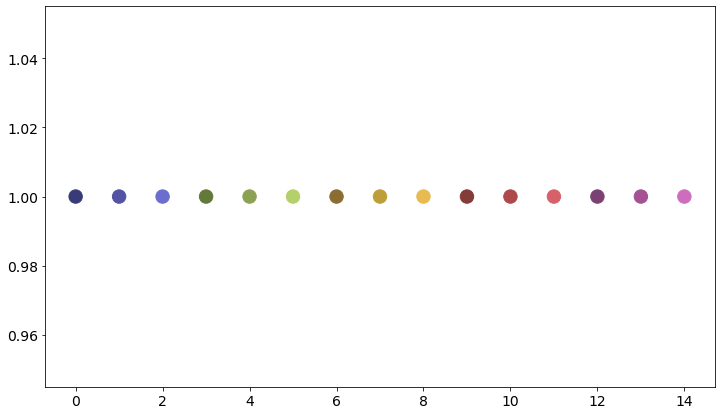

In [32]:
import matplotlib.pyplot as plt
import numpy as np

colors_tab20b =  plt.cm.tab20b( (4./3*np.arange(20*3/4)).astype(int) )
plt.scatter(np.arange(15),np.ones(15), c=colors_tab20b, s=180)

plt.show()


In [41]:
mpl.colors.to_hex(colors_tab20b[12])

'#7b4173'

In [37]:
mpl.colors.to_hex(colors_tab20b[10])

'#ad494a'